# Visualización

In [24]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'O']
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


<Axes: >

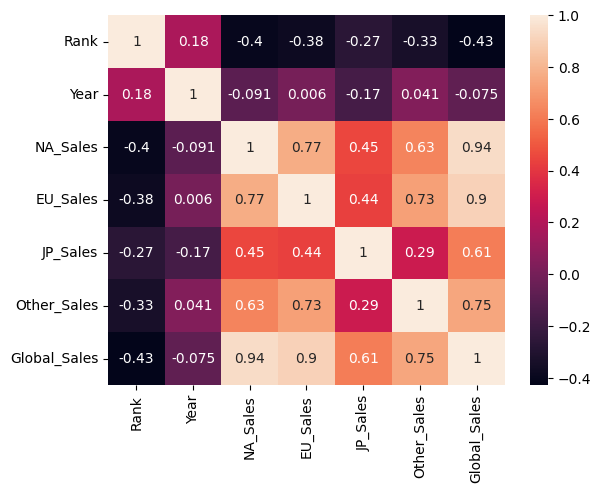

In [7]:
sns.heatmap(correlation_matrix, annot=True)

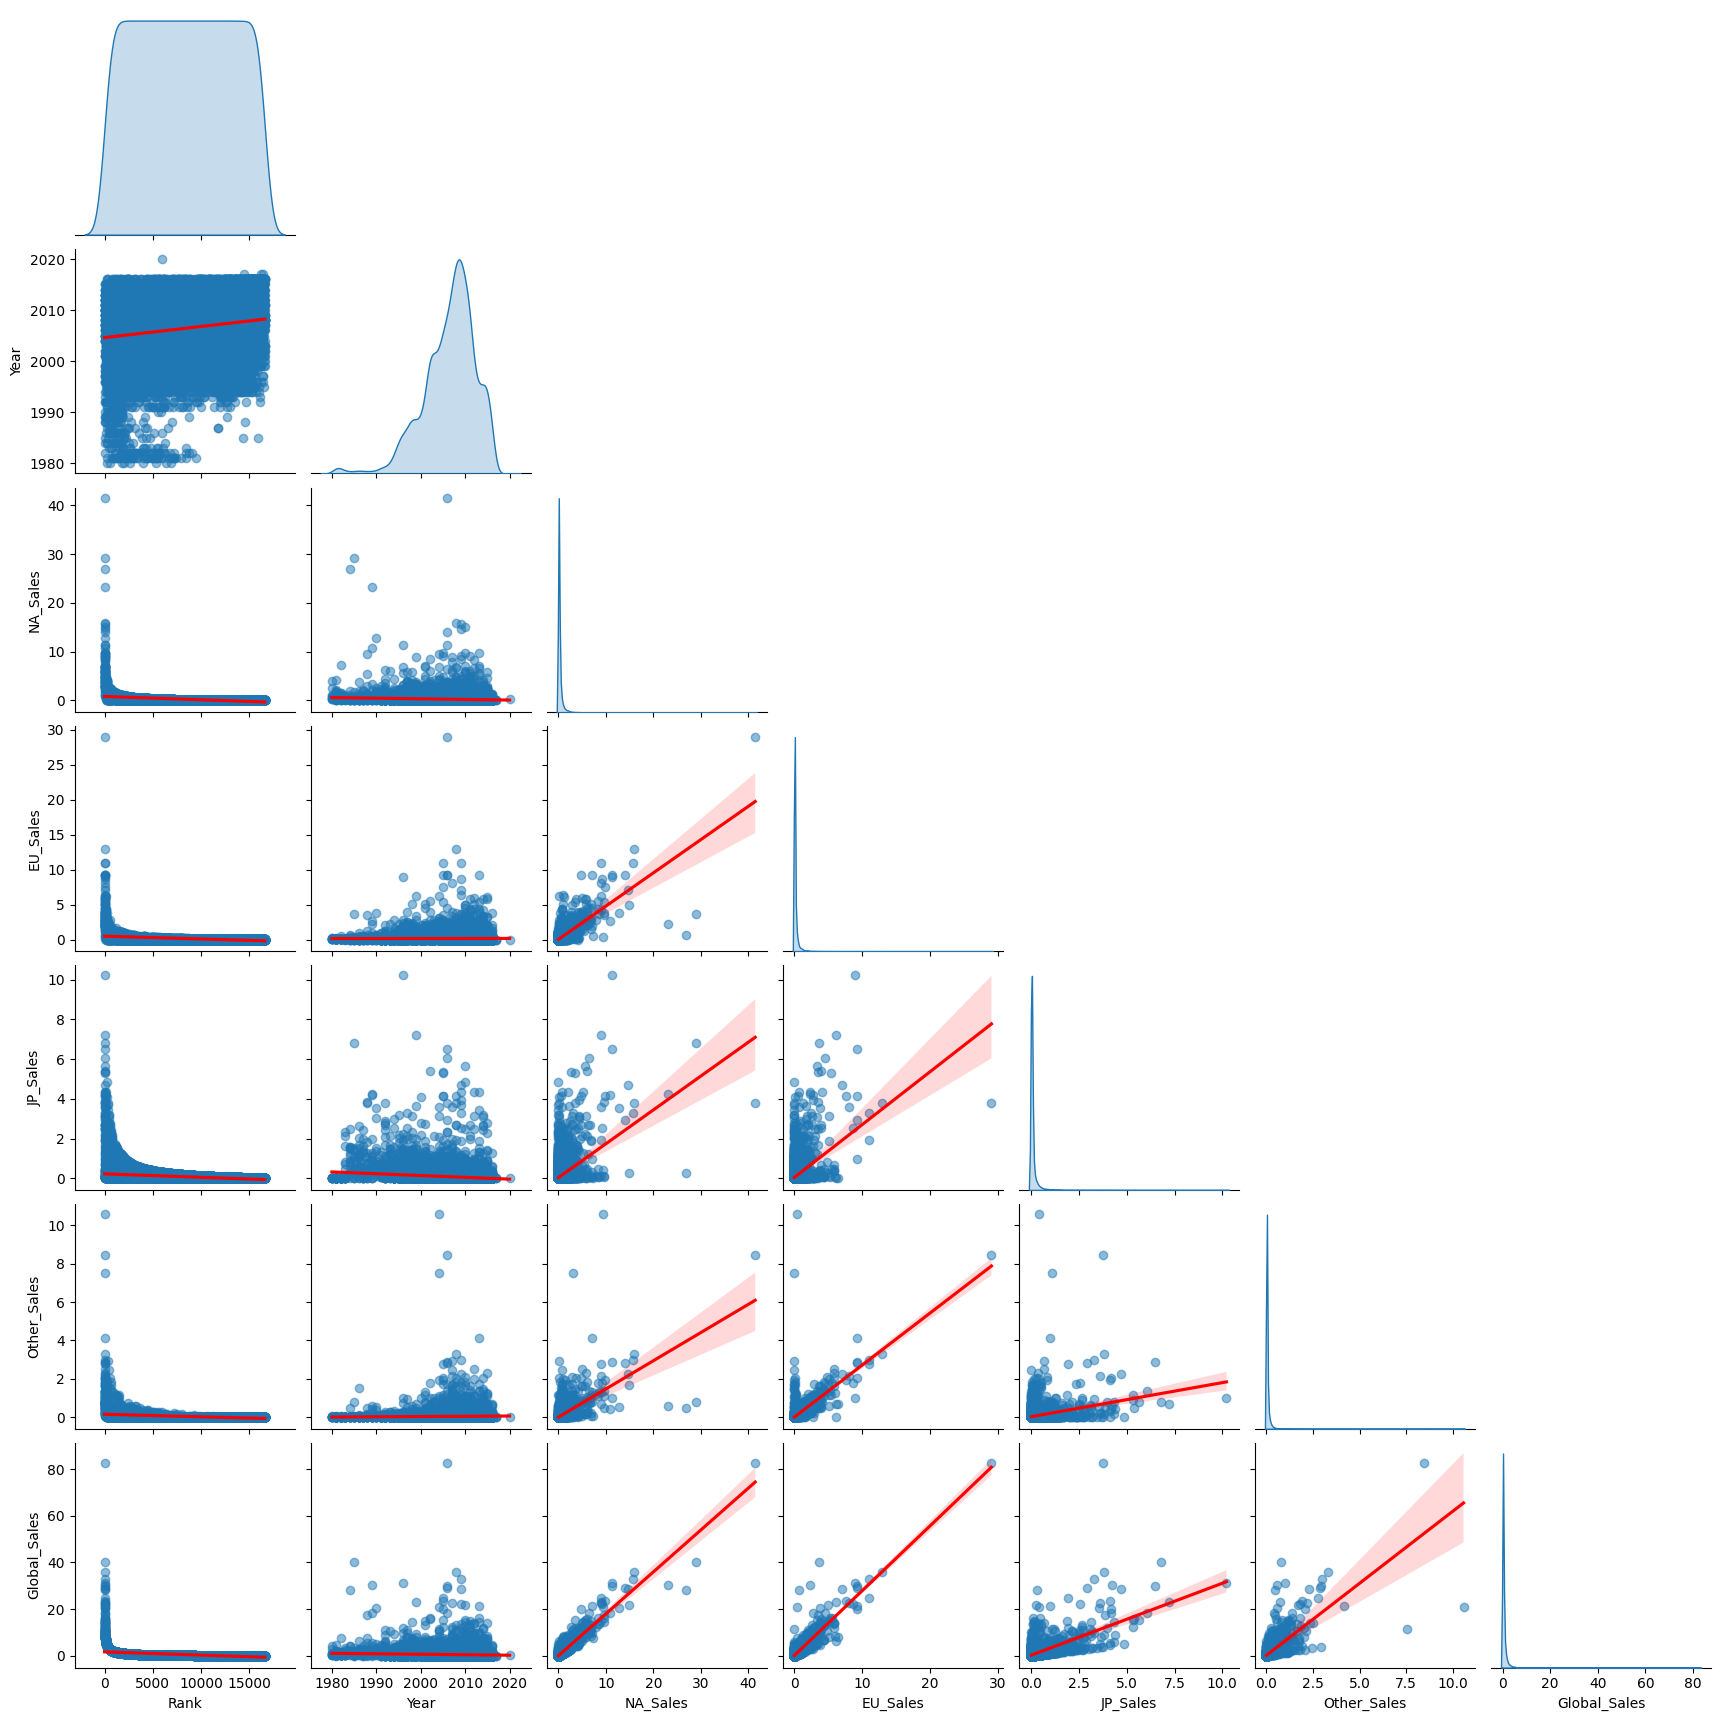

In [15]:
sns.pairplot(df[numerical_cols],
             diag_kind='kde',
             kind="reg",
             corner=True,
             plot_kws={
                "line_kws": {
                    "color": "red"
                    },
                "scatter_kws": {
                    "alpha": 0.5
                    }
             }
             )

# Gráfica de barras

<Axes: xlabel='Genre'>

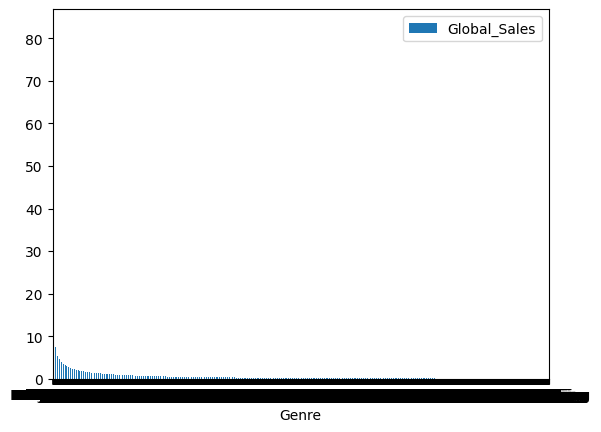

In [16]:
df.plot.bar(x='Genre', y='Global_Sales', rot=0)

In [19]:
df.groupby('Genre')["Global_Sales"].sum()

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

<Axes: xlabel='Genre'>

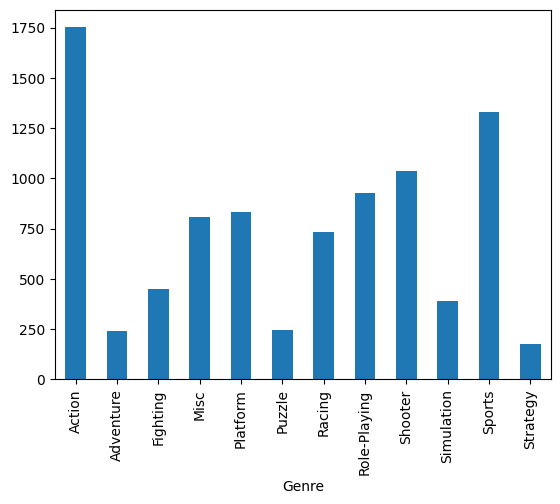

In [20]:
df.groupby('Genre')["Global_Sales"].sum().plot.bar()

In [21]:
df.groupby(["Publisher","Platform"])[["NA_Sales","Global_Sales"]].mean()

NA_Sales  Global_Sales
Publisher                    Platform                        
10TACLE Studios              DS        0.030000      0.045000
                             PS2       0.010000      0.020000
1C Company                   PC        0.003333      0.033333
20th Century Fox Video Games 2600      0.364000      0.388000
2D Boy                       PC        0.000000      0.040000
...                                         ...           ...
imageepoch Inc.              3DS       0.000000      0.020000
inXile Entertainment         PC        0.020000      0.100000
mixi, Inc                    3DS       0.000000      0.860000
responDESIGN                 PS2       0.020000      0.040000
                             XB        0.070000      0.090000

[1801 rows x 2 columns]

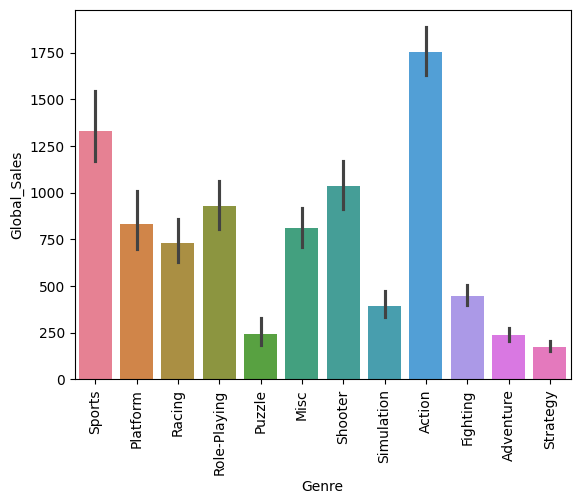

In [27]:
sns.barplot(data=df, x='Genre', y='Global_Sales',hue= 'Genre' ,estimator=sum)
plt.xticks(rotation=90)
plt.show()

# Gráfica de líneas

<Axes: xlabel='Year'>

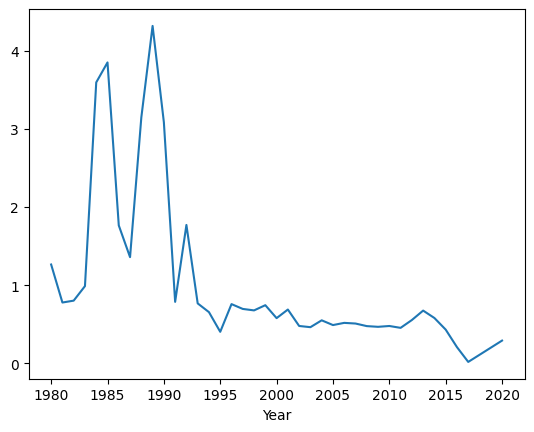

In [28]:
df.groupby("Year")["Global_Sales"].mean().plot.line(x='Year', y='Global_Sales')

<Axes: xlabel='Year', ylabel='Global_Sales'>

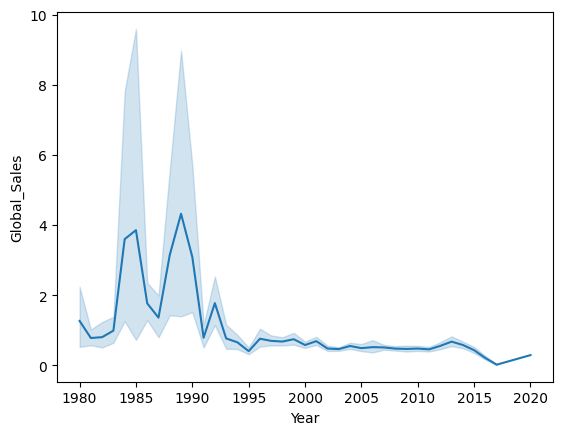

In [29]:
sns.lineplot(data=df, x='Year', y='Global_Sales', estimator='mean')

# Gráfica de dispersión

<Axes: xlabel='NA_Sales', ylabel='Global_Sales'>

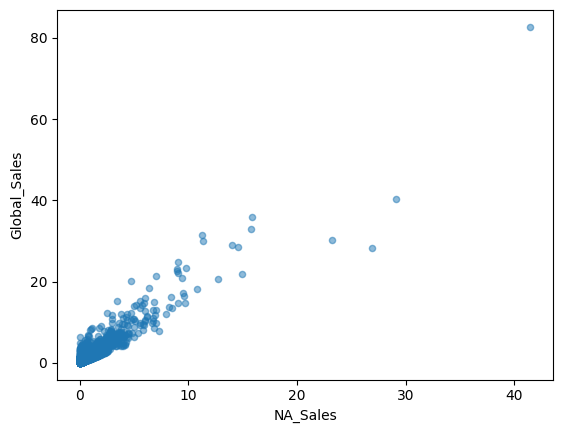

In [31]:
df.plot.scatter(x="NA_Sales", y="Global_Sales", alpha=0.5)

<Axes: xlabel='NA_Sales', ylabel='Global_Sales'>

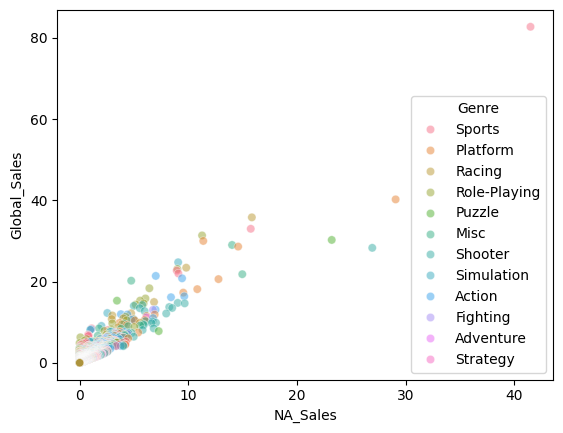

In [35]:
sns.scatterplot(data=df, 
                x="NA_Sales",
                y="Global_Sales",
                hue='Genre',
                alpha=0.5)

## Histogramas

<Axes: ylabel='Frequency'>

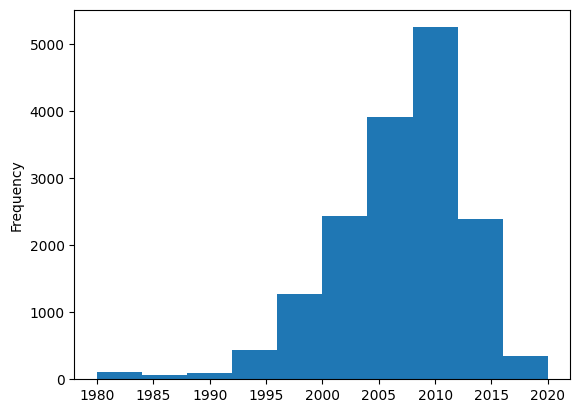

In [37]:
df["Year"].plot.hist(bins=10)

<Axes: xlabel='Year', ylabel='Count'>

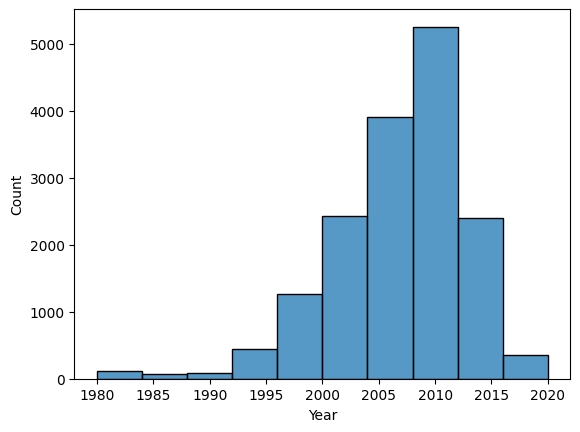

In [42]:
sns.histplot(data=df, x="Year", bins=10)

## Bloxplot (cajas y bigotes)

<Axes: >

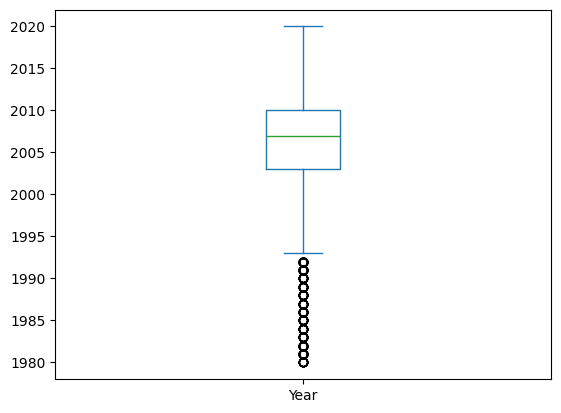

In [44]:
df["Year"].plot.box()

<Axes: ylabel='Year'>

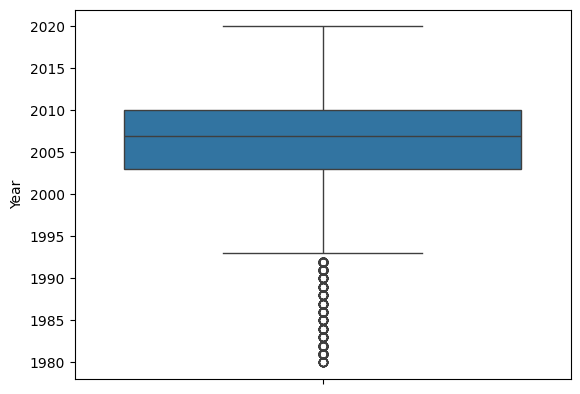

In [46]:
sns.boxplot(data=df, y="Year")

# Gráficas de pastel

<Axes: ylabel='count'>

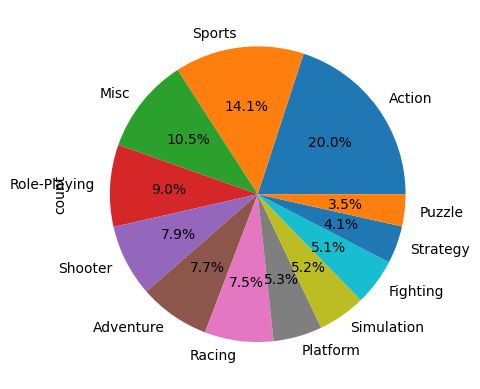

In [52]:
df["Genre"].value_counts().plot.pie(autopct="%2.1f%%")

#  KDE (Kernel Density Estimation)

<Axes: ylabel='Density'>

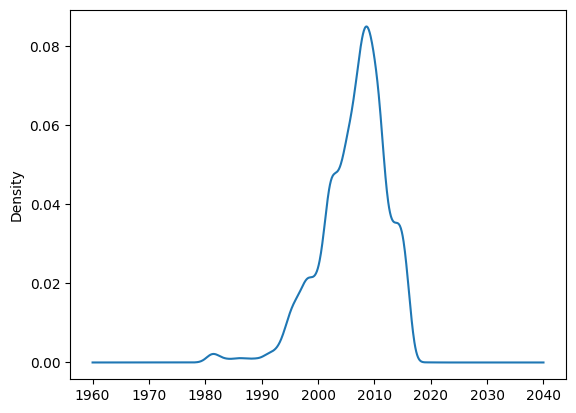

In [53]:
df["Year"].plot.kde()

<Axes: xlabel='Year', ylabel='Density'>

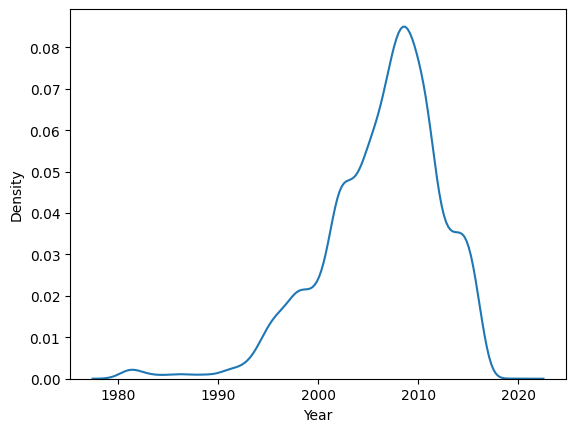

In [55]:
sns.kdeplot(data=df, x="Year")